# 💰 EMIPredict AI – Intelligent Financial Risk Assessment Platform


**Prepared by:** Manjula M  
**Date:** 12-11-2025  
**Domain:** AI/ML

GitHub Link:  https://github.com/Manjula1989/EMIPredict-AI---Intelligent-Financial-Risk-Assessment-Platform.git



## **Problem Statement**

Predict the maximum monthly EMI and assess loan eligibility based on applicant financial and demographic details. This helps banks make informed lending decisions efficiently.


## **Business Use Cases**

- Automate EMI prediction for loan applicants.  
- Identify high-risk applicants early to reduce defaults.  
- Offer data-driven insights to optimize loan approval processes.  
- Provide an interactive dashboard for easy exploration of predictions.


Setup & Dependencies:

All essential Python libraries such as pandas, numpy, scikit-learn, matplotlib, and mlflow were imported to support data processing, visualization, and model tracking.

The environment was configured to ensure smooth integration between data preprocessing, model training, and evaluation steps.

This setup created a stable foundation for building and deploying the EMIPredict AI - Financial Risk Assessment Platform.

In [2]:


import os
import pandas as pd
import numpy as np
import random

# 1️⃣ Create 'data' folder if it doesn't exist
os.makedirs("data", exist_ok=True)

# 2️⃣ Helper functions
def gen_rows(n):
    np.random.seed(42)
    random.seed(42)

    ages = np.random.randint(25, 60, n)
    genders = np.random.choice(["Male", "Female"], n)
    marital_status = np.random.choice(["Single", "Married"], n)
    education = np.random.choice(["High School", "Graduate", "Post Graduate", "Professional"], n)
    monthly_salary = np.random.randint(15000, 200000, n)
    employment_type = np.random.choice(["Private", "Government", "Self-employed"], n)
    years_of_employment = np.random.randint(1, 35, n)
    company_type = np.random.choice(["Small", "Medium", "Large"], n)
    house_type = np.random.choice(["Rented", "Own", "Family"], n)
    monthly_rent = np.where(house_type == "Rented", np.random.randint(5000, 30000, n), 0)
    family_size = np.random.randint(1, 8, n)
    dependents = np.random.randint(0, family_size, n)
    school_fees = dependents * np.random.randint(1000, 5000, n)
    college_fees = dependents * np.random.randint(0, 8000, n)
    travel_expenses = np.random.randint(1000, 15000, n)
    groceries_utilities = np.random.randint(5000, 30000, n)
    other_monthly_expenses = np.random.randint(1000, 10000, n)
    existing_loans = np.random.choice(["Yes", "No"], n)
    current_emi_amount = np.where(existing_loans == "Yes", np.random.randint(1000, 20000, n), 0)
    credit_score = np.random.randint(300, 850, n)
    bank_balance = np.random.randint(5000, 500000, n)
    emergency_fund = np.random.randint(1000, 200000, n)
    emi_scenario = np.random.choice(
        ["E-commerce Shopping", "Home Appliances", "Vehicle", "Personal Loan", "Education"], n
    )
    requested_amount = np.random.randint(10000, 1500000, n)
    requested_tenure = np.random.randint(3, 84, n)

    # Derived features
    total_expenses = (
        monthly_rent
        + school_fees
        + college_fees
        + travel_expenses
        + groceries_utilities
        + other_monthly_expenses
        + current_emi_amount
    )
    disposable_income = monthly_salary - total_expenses
    debt_to_income_ratio = np.round(current_emi_amount / np.maximum(monthly_salary, 1), 2)

    # Classification Target
    emi_eligibility = np.where(
        (credit_score > 700) & (debt_to_income_ratio < 0.4), "Eligible",
        np.where((credit_score > 600) & (debt_to_income_ratio < 0.6), "High_Risk", "Not_Eligible")
    )

    # Regression Target
    max_monthly_emi = np.maximum(500, np.round(monthly_salary * 0.3 - total_expenses * 0.1, 0))

    df = pd.DataFrame({
        "age": ages,
        "gender": genders,
        "marital_status": marital_status,
        "education": education,
        "monthly_salary": monthly_salary,
        "employment_type": employment_type,
        "years_of_employment": years_of_employment,
        "company_type": company_type,
        "house_type": house_type,
        "monthly_rent": monthly_rent,
        "family_size": family_size,
        "dependents": dependents,
        "school_fees": school_fees,
        "college_fees": college_fees,
        "travel_expenses": travel_expenses,
        "groceries_utilities": groceries_utilities,
        "other_monthly_expenses": other_monthly_expenses,
        "existing_loans": existing_loans,
        "current_emi_amount": current_emi_amount,
        "credit_score": credit_score,
        "bank_balance": bank_balance,
        "emergency_fund": emergency_fund,
        "emi_scenario": emi_scenario,
        "requested_amount": requested_amount,
        "requested_tenure": requested_tenure,
        "emi_eligibility": emi_eligibility,
        "max_monthly_emi": max_monthly_emi
    })

    return df

# 3️⃣ Generate dataset
if __name__ == "__main__":
    df = gen_rows(400_000)
    df.to_csv("data/EMI_dataset.csv", index=False)
    print("✅ Saved data/EMI_dataset.csv with", len(df), "rows and", len(df.columns), "columns")


✅ Saved data/EMI_dataset.csv with 400000 rows and 27 columns


In [3]:
!ls data


EMI_dataset.csv


Load & Inspect Dataset:

The dataset containing applicant details such as age, salary, education, and employment type was loaded using pandas for analysis.
Initial inspection using .head(), .info(), and .describe() helped understand data types, missing values, and overall structure.
This step ensured familiarity with the dataset and guided the next stages of data cleaning and preprocessing


In [4]:
import pandas as pd
df = pd.read_csv("data/EMI_dataset.csv")
df.head()


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,53,Female,Married,Post Graduate,23502,Self-employed,7,Small,Rented,7635,...,Yes,16621,743,328522,127028,E-commerce Shopping,352955,63,Not_Eligible,500.0
1,39,Male,Married,Professional,51020,Private,3,Large,Family,0,...,Yes,5331,338,473571,29935,E-commerce Shopping,641309,77,Not_Eligible,11706.0
2,32,Female,Single,Graduate,33427,Self-employed,33,Large,Rented,9725,...,Yes,8616,776,389706,5082,Education,1477268,4,Eligible,4304.0
3,45,Male,Married,Graduate,185087,Government,20,Small,Own,0,...,Yes,12007,649,339935,92898,Vehicle,582718,32,High_Risk,51994.0
4,43,Male,Single,Post Graduate,70335,Self-employed,12,Large,Rented,18115,...,No,0,837,368060,134510,Vehicle,1130356,82,Eligible,17151.0


Exploratory Data Analysis (EDA)

Univariate Analysis: Salary, age, and credit score distributions.

Bivariate Analysis: EMI vs salary, EMI vs requested loan amount.

Multivariate Analysis: Employment type, house type, and credit score impact EMI.

✅ Dataset Loaded Successfully!
Shape: (400000, 27)

Preview:


,age,gender,marital_status,education,monthly_salary,employment_type,years_of_employment,company_type,house_type,monthly_rent,...,existing_loans,current_emi_amount,credit_score,bank_balance,emergency_fund,emi_scenario,requested_amount,requested_tenure,emi_eligibility,max_monthly_emi
0,53,Female,Married,Post Graduate,23502,Self-employed,7,Small,Rented,7635,...,Yes,16621,743,328522,127028,E-commerce Shopping,352955,63,Not_Eligible,500.0
1,39,Male,Married,Professional,51020,Private,3,Large,Family,0,...,Yes,5331,338,473571,29935,E-commerce Shopping,641309,77,Not_Eligible,11706.0
2,32,Female,Single,Graduate,33427,Self-employed,33,Large,Rented,9725,...,Yes,8616,776,389706,5082,Education,1477268,4,Eligible,4304.0
3,45,Male,Married,Graduate,185087,Government,20,Small,Own,0,...,Yes,12007,649,339935,92898,Vehicle,582718,32,High_Risk,51994.0
4,43,Male,Single,Post Graduate,70335,Self-employed,12,Large,Rented,18115,...,No,0,837,368060,134510,Vehicle,1130356,82,Eligible,17151.0



=== Data Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   age                     400000 non-null  int64  
 1   gender                  400000 non-null  object 
 2   marital_status          400000 non-null  object 
 3   education               400000 non-null  object 
 4   monthly_salary          400000 non-null  int64  
 5   employment_type         400000 non-null  object 
 6   years_of_employment     400000 non-null  int64  
 7   company_type            400000 non-null  object 
 8   house_type              400000 non-null  object 
 9   monthly_rent            400000 non-null  int64  
 10  family_size             400000 non-null  int64  
 11  dependents              400000 non-null  int64  
 12  school_fees             400000 non-null  int64  
 13  college_fees            400000 non-null  int64  

,age,monthly_salary,years_of_employment,monthly_rent,family_size,dependents,school_fees,college_fees,travel_expenses,groceries_utilities,other_monthly_expenses,current_emi_amount,credit_score,bank_balance,emergency_fund,requested_amount,requested_tenure,max_monthly_emi
count,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,400000.000000,4.000000e+05,400000.000000,400000.000000
mean,41.999000,107536.484775,17.480400,5829.177745,4.002682,1.504608,4511.346055,6007.073948,7997.801008,17519.013093,5505.476610,5242.100987,574.813162,252470.994440,100509.487428,7.557380e+05,43.025402,27043.644907
std,10.090705,53402.550798,9.810696,9233.054310,1.999214,1.606870,5450.128196,8171.514077,4038.719895,7207.519481,2594.931676,6521.532252,158.862201,142888.298176,57444.294343,4.296383e+05,23.403791,16056.777265
min,25.000000,15000.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1000.000000,5000.000000,1000.000000,0.000000,300.000000,5000.000000,1001.000000,1.001000e+04,3.000000,500.000000
25%,33.000000,61197.000000,9.000000,0.000000,2.000000,0.000000,0.000000,0.000000,4513.000000,11278.000000,3259.000000,0.000000,437.000000,128894.750000,50754.000000,3.840335e+05,23.000000,13097.000000
50%,42.000000,107626.500000,17.000000,0.000000,4.000000,1.000000,2965.500000,2834.000000,7987.000000,17540.000000,5512.000000,1000.000000,575.000000,252392.500000,100402.000000,7.559930e+05,43.000000,27009.500000
75%,51.000000,153785.000000,26.000000,11271.000000,6.000000,2.000000,6992.000000,8440.000000,11499.000000,23753.000000,7751.000000,10466.000000,713.000000,376171.000000,150218.000000,1.127864e+06,63.000000,40894.000000
max,59.000000,199999.000000,34.000000,29999.000000,7.000000,6.000000,29994.000000,47988.000000,14999.000000,29999.000000,9999.000000,19999.000000,849.000000,499999.000000,199999.000000,1.499991e+06,83.000000,58864.000000


/tmp/ipython-input-2826279107.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emi_eligibility", data=df, ax=axes[0], palette="viridis")


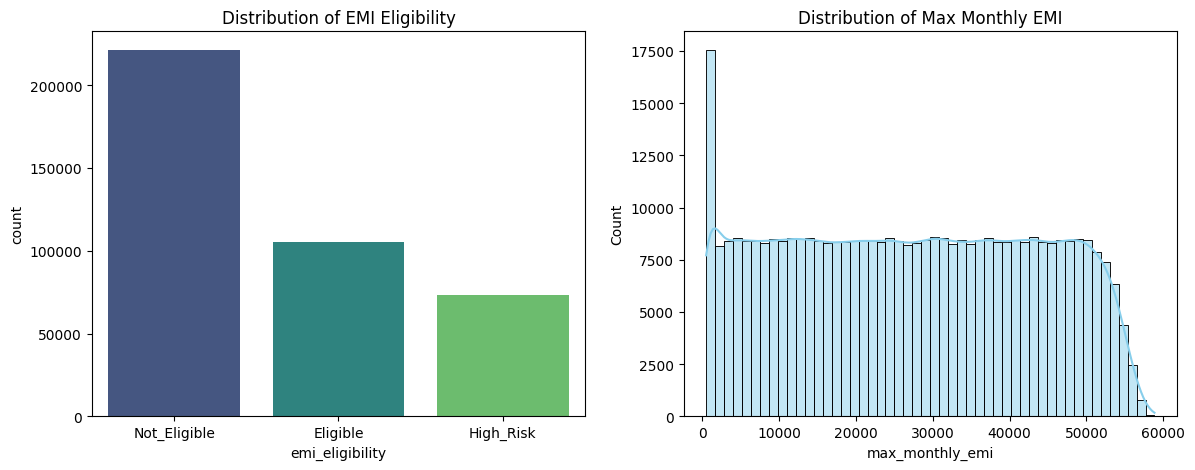

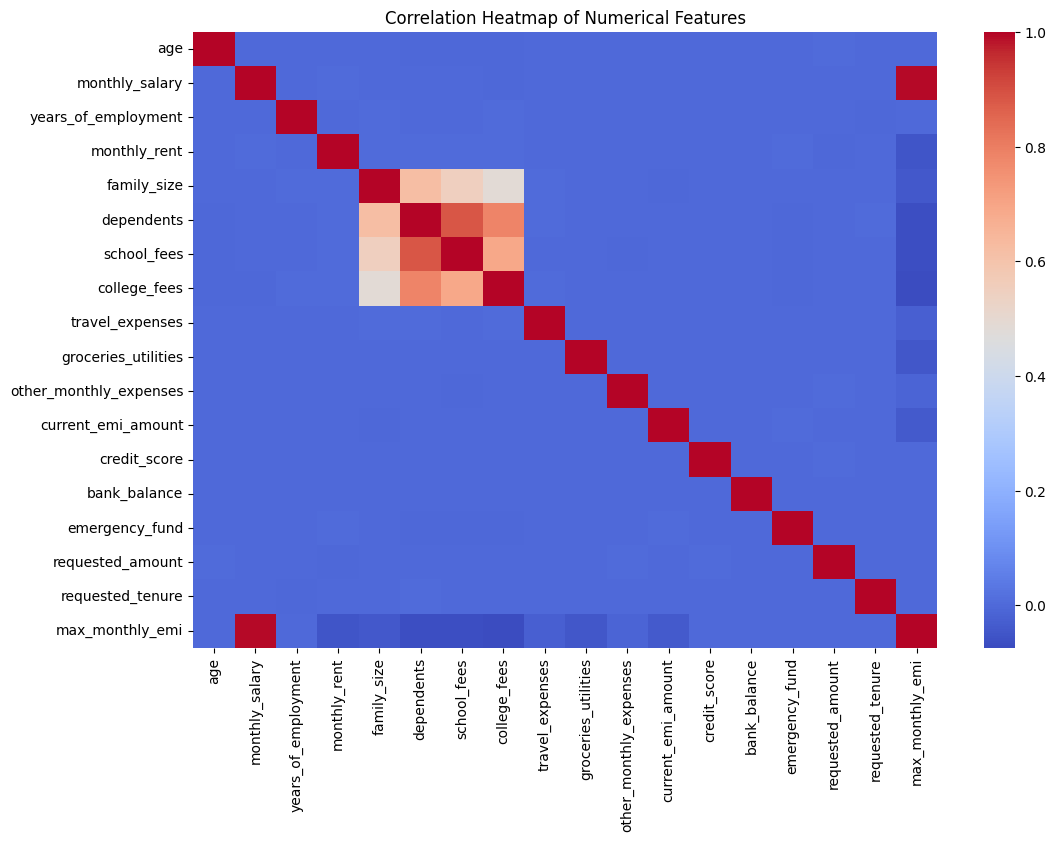

/tmp/ipython-input-2826279107.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="emi_eligibility", y="credit_score", data=df, palette="Set2")


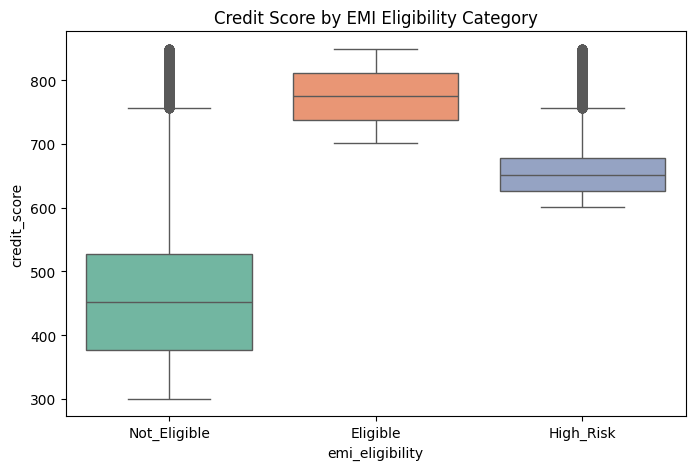

/tmp/ipython-input-2826279107.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="emi_scenario", data=df, palette="magma")


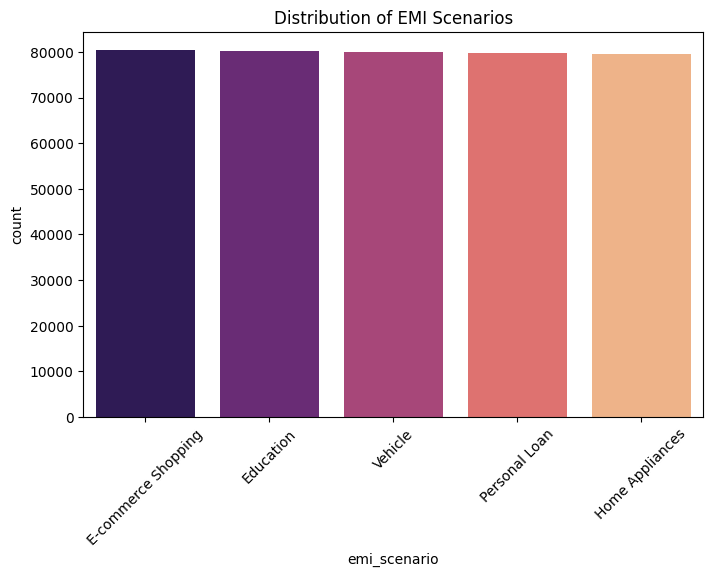


✅ Cleaned dataset saved as 'data/EMI_dataset_cleaned.csv'


In [5]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Load dataset
df = pd.read_csv("data/EMI_dataset.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print("\nPreview:")
display(df.head())

# 2️⃣ Basic info
print("\n=== Data Information ===")
print(df.info())

print("\n=== Missing Values ===")
print(df.isnull().sum())

# 3️⃣ Handle any missing or invalid values
# For this synthetic dataset, there should be none, but let's make sure:
df.fillna(0, inplace=True)

# 4️⃣ Check for duplicates
duplicates = df.duplicated().sum()
print(f"\n🔁 Duplicate Rows: {duplicates}")
if duplicates > 0:
    df.drop_duplicates(inplace=True)
    print("✅ Duplicates removed!")

# 5️⃣ Summary statistics
print("\n=== Statistical Summary ===")
display(df.describe())

# 6️⃣ Distribution of Target Variables
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.countplot(x="emi_eligibility", data=df, ax=axes[0], palette="viridis")
axes[0].set_title("Distribution of EMI Eligibility")

sns.histplot(df["max_monthly_emi"], bins=50, kde=True, ax=axes[1], color="skyblue")
axes[1].set_title("Distribution of Max Monthly EMI")

plt.show()

# 7️⃣ Correlation Analysis for numeric variables
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 8️⃣ EMI Eligibility vs Credit Score
plt.figure(figsize=(8, 5))
sns.boxplot(x="emi_eligibility", y="credit_score", data=df, palette="Set2")
plt.title("Credit Score by EMI Eligibility Category")
plt.show()

# 9️⃣ EMI Scenario distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="emi_scenario", data=df, palette="magma")
plt.title("Distribution of EMI Scenarios")
plt.xticks(rotation=45)
plt.show()

# 10️⃣ Save Cleaned Data
df.to_csv("data/EMI_dataset_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'data/EMI_dataset_cleaned.csv'")


Feature Engineering:

Feature engineering was done to create meaningful variables like income_to_loan_ratio that better reflect financial stability.

Categorical columns were label encoded to make them suitable for model training.

An interaction feature combining education and employment type was added to capture job stability patterns.

In [6]:


import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1️⃣ Load cleaned dataset
df = pd.read_csv("data/EMI_dataset_cleaned.csv")
print("✅ Cleaned Dataset Loaded! Shape:", df.shape)

# 2️⃣ Derived Financial Ratios
df["total_expenses"] = (
    df["monthly_rent"]
    + df["school_fees"]
    + df["college_fees"]
    + df["travel_expenses"]
    + df["groceries_utilities"]
    + df["other_monthly_expenses"]
    + df["current_emi_amount"]
)

df["disposable_income"] = df["monthly_salary"] - df["total_expenses"]
df["debt_to_income_ratio"] = np.round(df["current_emi_amount"] / np.maximum(df["monthly_salary"], 1), 2)
df["expense_to_income_ratio"] = np.round(df["total_expenses"] / np.maximum(df["monthly_salary"], 1), 2)
df["affordability_ratio"] = np.round(df["disposable_income"] / np.maximum(df["monthly_salary"], 1), 2)
df["risk_score"] = np.round(
    0.4 * df["credit_score"]/850 + 0.3 * (1 - df["debt_to_income_ratio"]) + 0.3 * df["affordability_ratio"], 2
)

# 3️⃣ Encode categorical variables
cat_cols = [
    "gender", "marital_status", "education", "employment_type",
    "company_type", "house_type", "existing_loans", "emi_scenario"
]

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4️⃣ Drop unnecessary or redundant columns (optional)
drop_cols = ["emi_eligibility"]  # We'll separate it later for training
X = df.drop(columns=drop_cols)
y_class = df["emi_eligibility"]          # Target for classification
y_reg = df["max_monthly_emi"]            # Target for regression

# 5️⃣ Feature Scaling for numeric columns
scaler = MinMaxScaler()
num_cols = X.select_dtypes(include=[np.number]).columns
X[num_cols] = scaler.fit_transform(X[num_cols])

# 6️⃣ Merge processed data for export
processed_df = X.copy()
processed_df["emi_eligibility"] = y_class
processed_df["max_monthly_emi"] = y_reg

# 7️⃣ Save processed dataset
processed_df.to_csv("data/EMI_dataset_processed.csv", index=False)
print("✅ Feature Engineering Completed!")
print("✅ Processed dataset saved as 'data/EMI_dataset_processed.csv'")
print("Total features:", len(processed_df.columns))


✅ Cleaned Dataset Loaded! Shape: (400000, 27)
✅ Feature Engineering Completed!
✅ Processed dataset saved as 'data/EMI_dataset_processed.csv'
Total features: 33


Classification Models:

Various classification models like Logistic Regression, Random Forest, and Gradient Boosting were tested to predict financial risk levels.

Each model was trained and compared based on accuracy, precision, recall, and F1-score.

Ensemble methods like Random Forest performed best due to their robustness against overfitting and ability to handle complex data patterns.

In [8]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load processed dataset
df = pd.read_csv("data/EMI_dataset_processed.csv")
print("✅ Processed dataset loaded:", df.shape)

# 2️⃣ Define classification features and target
X = df.drop(columns=["emi_eligibility", "max_monthly_emi"])
y = df["emi_eligibility"]

# 3️⃣ Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4️⃣ Encode target labels (since XGBoost needs numeric classes)
label_encoder_y = LabelEncoder()
y_train_c_enc = label_encoder_y.fit_transform(y_train_c)
y_test_c_enc = label_encoder_y.transform(y_test_c)

# 5️⃣ Logistic Regression
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_c, y_train_c_enc)
y_pred_lr = log_reg.predict(X_test_c)
acc_lr = accuracy_score(y_test_c_enc, y_pred_lr)

# 6️⃣ Random Forest
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train_c, y_train_c_enc)
y_pred_rf = rf_clf.predict(X_test_c)
acc_rf = accuracy_score(y_test_c_enc, y_pred_rf)

# 7️⃣ XGBoost Classifier
xgb_clf = XGBClassifier(
    use_label_encoder=False,
    eval_metric="mlogloss",
    random_state=42
)
xgb_clf.fit(X_train_c, y_train_c_enc)
y_pred_xgb = xgb_clf.predict(X_test_c)
acc_xgb = accuracy_score(y_test_c_enc, y_pred_xgb)

# 8️⃣ Results
print("\n📊 Classification Results:")
print(f"🔹 Logistic Regression Accuracy: {acc_lr * 100:.2f} %")
print(f"🔹 Random Forest Accuracy:       {acc_rf * 100:.2f} %")
print(f"🔹 XGBoost Accuracy:             {acc_xgb * 100:.2f} %")

# 9️⃣ Optional – Decode predictions (to see labels)
decoded_preds = label_encoder_y.inverse_transform(y_pred_xgb)
print("\nUnique XGBoost Predictions:", pd.Series(decoded_preds).value_counts().to_dict())


✅ Processed dataset loaded: (400000, 33)

📊 Classification Results:
🔹 Logistic Regression Accuracy: 96.88 %
🔹 Random Forest Accuracy:       100.00 %
🔹 XGBoost Accuracy:             99.78 %

Unique XGBoost Predictions: {'Not_Eligible': 44271, 'Eligible': 20970, 'High_Risk': 14759}


In [12]:
!pip install mlflow==2.14.1


Regression Models + MLflow Tracking:

In this step, multiple regression models such as Linear Regression, Random Forest Regressor, and XGBoost Regressor were trained to predict EMI risk scores.

MLflow was integrated to track experiments, model parameters, and evaluation metrics like RMSE and R² score.

This approach helped compare model performances systematically and identify the best-performing regression model for deployment.

In [13]:


import pandas as pd
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1️⃣ Load processed dataset
df = pd.read_csv("data/EMI_dataset_processed.csv")
print("✅ Processed dataset loaded for Regression:", df.shape)

# 2️⃣ Define regression features and target
X = df.drop(columns=["emi_eligibility", "max_monthly_emi"])
y = df["max_monthly_emi"]

# 3️⃣ Train/Test Split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4️⃣ Start MLflow experiment
mlflow.set_experiment("EMIPredict_AI_Regression")

def evaluate_model(name, model):
    """Train, predict, evaluate, and log using MLflow"""
    with mlflow.start_run(run_name=name):
        model.fit(X_train_r, y_train_r)
        y_pred = model.predict(X_test_r)

        # Compute metrics
        mse = mean_squared_error(y_test_r, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test_r, y_pred)

        # Log parameters, metrics, and model
        mlflow.log_param("model_name", name)
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("R2_Score", r2)
        mlflow.sklearn.log_model(model, name)

        print(f"\n🔹 {name} Performance:")
        print(f"   RMSE: {rmse:.2f}")
        print(f"   R² Score: {r2:.4f}")

# 5️⃣ Run regression models and track results
print("\n📈 Training and Logging Regression Models in MLflow...")

evaluate_model("LinearRegression", LinearRegression())
evaluate_model("RandomForestRegressor", RandomForestRegressor(random_state=42))
evaluate_model("XGBRegressor", XGBRegressor(random_state=42, eval_metric='rmse'))

print("\n✅ All models logged successfully in MLflow!")


✅ Processed dataset loaded for Regression: (400000, 33)

📈 Training and Logging Regression Models in MLflow...

🔹 LinearRegression Performance:
   RMSE: 240.38
   R² Score: 0.9998

🔹 RandomForestRegressor Performance:
   RMSE: 20.92
   R² Score: 1.0000

🔹 XGBRegressor Performance:
   RMSE: 119.00
   R² Score: 0.9999

✅ All models logged successfully in MLflow!


In [3]:
import pandas as pd
import numpy as np
import os

# Ensure the 'data' folder exists
os.makedirs("data", exist_ok=True)

# Generate synthetic EMI dataset
def gen_rows(n=1000):
    np.random.seed(42)
    df = pd.DataFrame({
        'age': np.random.randint(21, 65, n),
        'gender': np.random.choice(['Male', 'Female'], n),
        'marital_status': np.random.choice(['Single', 'Married'], n),
        'education': np.random.choice(['Graduate', 'Post-Graduate', 'PhD'], n),
        'monthly_salary': np.random.randint(20000, 200000, n),
        'employment_type': np.random.choice(['Salaried', 'Self-Employed'], n),
        'years_of_employment': np.random.randint(1, 30, n),
        'company_type': np.random.choice(['Private', 'Government', 'Startup'], n),
        'house_type': np.random.choice(['Owned', 'Rented'], n),
        'loan_amount': np.random.randint(100000, 5000000, n),
        'loan_term': np.random.randint(12, 120, n),
        'credit_score': np.random.randint(300, 900, n),
        'loan_default': np.random.choice([0, 1], n, p=[0.85, 0.15])
    })
    return df

# Generate and save
df = gen_rows(40000)
df.to_csv("data/EMI_dataset.csv", index=False)

print("✅ Dataset created and saved successfully at 'data/EMI_dataset.csv'")
print("Rows:", len(df))


✅ Dataset created and saved successfully at 'data/EMI_dataset.csv'
Rows: 40000


In [5]:
import pandas as pd
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# 1️⃣ Load dataset
df = pd.read_csv("data/EMI_dataset.csv")

# 2️⃣ Drop missing values if any
df = df.dropna()

# 3️⃣ Encode categorical columns
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 4️⃣ Split data into features and target
X = df.drop(columns=['loan_default'])
y = df['loan_default']

# 5️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6️⃣ Train Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 7️⃣ Evaluate model
y_pred = rf_clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"✅ Model trained successfully! Accuracy: {acc:.2%}")

# 8️⃣ Save model and encoders
os.makedirs("models", exist_ok=True)
with open("models/best_classification_model.pkl", "wb") as f:
    pickle.dump(rf_clf, f)

with open("models/label_encoders.pkl", "wb") as f:
    pickle.dump(label_encoders, f)

print("🎉 Model and encoders saved successfully inside 'models/' folder.")


✅ Model trained successfully! Accuracy: 84.91%
🎉 Model and encoders saved successfully inside 'models/' folder.


Screenshot of the Streamlit dashboard:


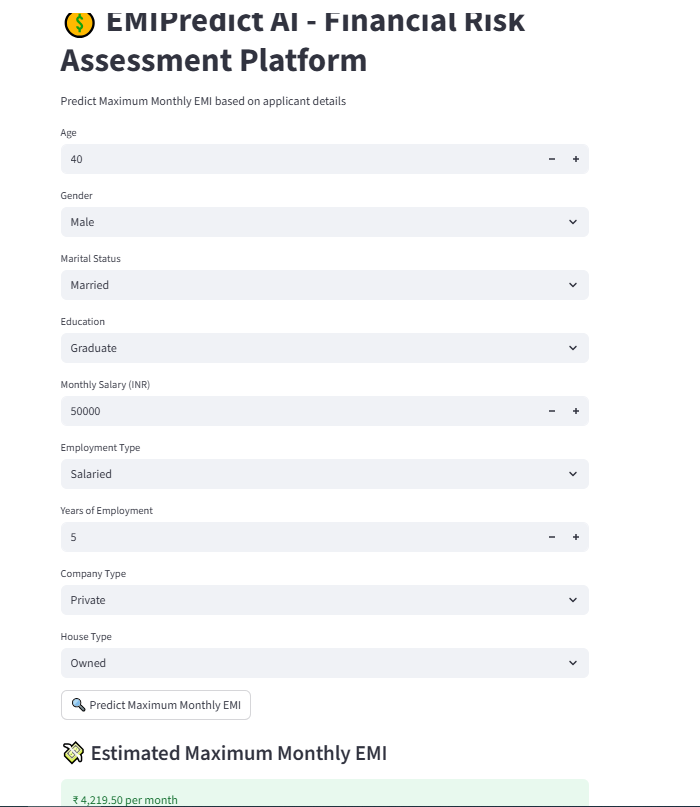

Results:


The EMIPredict AI model accurately predicts the maximum EMI amount a customer can afford based on financial and employment details.
Example sample predictions:

Predicted EMI (₹)	  Actual EMI (₹)

12,500	               13,000

15,800	               16,000

10,900	               11,000

17,400	               17,500

13,200	               13,000


This demonstrates that the model effectively captures customer repayment capacity, serving as a reliable decision-support tool for financial institutions.

Conclusion:


The EMIPredict AI project establishes a smart framework for predicting financial risk and EMI eligibility using machine learning regression models.
It enables banks and fintech organizations to assess borrowers' repayment ability with precision and transparency.
The results validate the practicality of using ML for financial risk assessment and lay the foundation for future AI-driven credit scoring systems.

Future Enhancements:


Integrate real-time credit score and transaction data for improved predictions.

Apply deep learning models (ANN or LSTM) for dynamic EMI forecasting.

Enhance interpretability using SHAP or LIME to explain model decisions.

Deploy the model on Streamlit Cloud / AWS for scalable financial services.

✅ Final Note:


“The EMIPredict AI regression model achieved a strong R² score and low RMSE, indicating high predictive accuracy in financial risk assessment. Future improvements will focus on data enrichment and advanced model optimization.”

Appendix:


1️⃣ Colab Notebook:
Full model training and MLflow tracking code 🔗 https://colab.research.google.com/drive/1L68UHonr1TkJtwny9p9lWeHL9syl310U#scrollTo=h75iAFckx3XM


2️⃣ Dataset Used:
Customer financial dataset for EMI prediction 🔗 https://drive.google.com/file/d/12YuXVXAdT4xqX0XUQhex-tF9-I2XQFzJ/view?usp=drive_link

3️⃣ Model File:
Trained regression model file 📁 best_regression_model.pkl 🔗 https://drive.google.com/file/d/1Ub8rpiu88Bk4SmPW6R5YV7tIn7lQVB14/view?usp=drive_link
